In [2]:
pip install scikit-learn


The following command must be run outside of the IPython shell:

    $ pip install scikit-learn

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/


In [4]:
!pip install scikit-learn

In [43]:
from sklearn import datasets
iris = datasets.load_iris()
x = iris.data
y = iris.target

from sklearn.model_selection import train_test_split
itr, it, otr, ot = train_test_split(x, y, test_size = .5)
from sklearn import tree

classifier = tree.DecisionTreeClassifier()
classifier.fit(itr, otr)

predictions = classifier.predict(it)
print(predictions)
print(ot)

from sklearn.metrics import accuracy_score

print(accuracy_score(ot, predictions))
print(len(ot))

[2 2 2 0 0 0 0 2 1 2 2 0 0 1 1 1 2 1 0 0 0 2 1 2 0 1 2 0 1 1 2 0 1 1 1 0 0
 2 1 1 0 1 1 2 1 0 2 2 1 1 2 1 2 2 0 2 0 2 0 1 2 2 1 0 0 1 0 1 0 0 2 1 1 2
 1]
[2 2 2 0 0 0 0 2 1 1 1 0 0 1 1 1 2 1 0 0 0 2 1 2 0 1 2 0 1 1 2 0 1 1 1 0 0
 2 1 1 0 1 1 2 1 0 2 2 2 1 2 1 2 2 0 2 0 2 0 1 2 2 1 0 0 1 0 1 0 0 2 2 1 2
 1]
0.9466666666666667
75


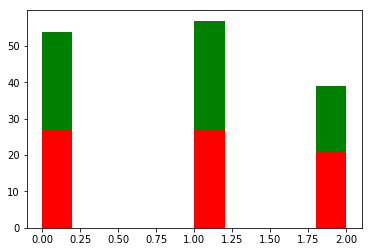

In [26]:
import matplotlib.pyplot as plt
plt.hist([ot, predictions], stacked=True, color=['r', 'g'])
plt.show()

In [63]:
# from sklearn.neighbors import KNeighborsClassifier
import random
from scipy.spatial import distance

def euc(a, b):
    return distance.euclidean(a, b)


class MyScrappyKNN():
    def fit(self, train_features, train_labels):
        self.xtrain = train_features
        self.ytrain = train_labels
    
    def predict(self, test_features):
        predictions = []
        
        for row in test_features:
            label = self.closest(row)
            predictions.append(label)
        return predictions
    
    def closest(self, test_point):
        best_index = 0
        best_distance = euc(self.xtrain[0], test_point)
        for i in range(1, len(self.xtrain)):
            current_distance = euc(self.xtrain[i], test_point)
            if current_distance < best_distance :
                best_index = i
                best_distance = current_distance
        
        return self.ytrain[best_index]
                
        
    
itr, it, otr, ot = train_test_split(x, y, test_size = .5)
classifier = MyScrappyKNN()
classifier.fit(itr, otr)

predictions = classifier.predict(it)
print(predictions)
print(ot)

from sklearn.metrics import accuracy_score

print(accuracy_score(predictions, ot))


[1, 1, 0, 0, 2, 2, 1, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 2, 2, 2, 0, 0, 1, 0, 0, 1, 1, 2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 2, 0, 2, 2, 1, 0, 0, 1, 2, 0, 2, 2, 2, 1, 1, 2, 0, 1, 1, 2, 1, 2, 1]
[1 1 0 0 2 2 1 1 2 1 2 0 0 1 1 1 1 2 2 2 0 0 1 0 0 1 1 2 0 0 0 2 2 0 0 1 1
 1 1 1 0 1 1 0 2 0 1 1 0 0 0 0 1 0 2 2 1 0 0 1 2 0 2 2 2 1 1 2 0 2 1 2 1 2
 1]
0.9466666666666667
